# Foundations of Data Science (GDW) 2023
### Phuc Ha Duy


# Exercise I: Data Retrieval

In the lecture, a couple of tools and different origins of data where presented. In this exercise you will
learn how to retrieve data
- from an Application Progarmming Interface,
- from a website using Scraping,
- from a database using SQL.



## Part 1: API

The easiest method to retrieve external data is to connect with an API. 
These are services you query for some data and in response the data is provided. This communication is via network
and needs to follow some protocols. Most prominent protocols for APIs are REST and SOAP ser-
vices via Hypertext Transfer Protocol (HTTP, the same protocol your browser uses to retrieve web-
sites).

A simple example for such a REST API is provided by the library. Following request retrieves information on the availability of a certain journal:

https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=html

In REST APIs you may easily change the parameters, to get the information you want, or (if provided)
to change the response format. Please compare the responses to the following requests with the upper:

https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=json

https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=xml

In Python you could send API requests with the package requests.

In [1]:
import requests
URL1 = 'https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=html'
#URL2 = 'https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=json'
#URL3 = 'https://api.ub.tu-dortmund.de/daia/openurl?/&issn=00431648&format=xml'
page = requests.get(URL1)
print(page.content)


ModuleNotFoundError: No module named 'requests'

Besides officially provided APIs, many interfaces among services in the internet rely on APIs to exchange their data. 
These interfaces could be exploited by sending API requests.

### Task 1.1
Given these basics, in the following you will focus autonomously on another example.

- Browse to the following website of the open data portal https://geoweb1.digistadtdo.de/doris_gdi/index.html
- Open the developer mode of your browser (e.g. in Chrome it's Ctrl + Shift + i ) and observe in the network tab which urls are fetched when moving the map around.

Report your findings below:

...

### Task 1.2

Here is a simple script that fetches the logo of the LS8 and plots it.

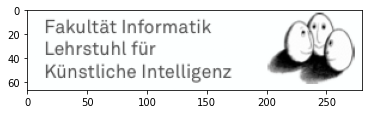

In [ ]:
import requests 
from io import BytesIO 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

url="https://www-ai.cs.tu-dortmund.de/header-bg-topLeft.png"
response = requests.get(url)
img = mpimg.imread(BytesIO(response.content))
imgplot = plt.imshow(img)
plt.show()


Write a simple program that fetches and plots the map view of the TU Dortmund from the WMS server of the OpenData Portal of the city of Dortmund (You found its URL and parameters in previous step).

In [ ]:
# insert code here

## Part 2: Web Scraping

Lots of data is available on websites. Often, it is necessary to collect it from these sites. 

This process is called *scraping*. One essential python package, requests, was already used in **Task 1.2**

Another essential package for website scraping is `BeautifulSoup`. This provides you the contents of
some HTML tag. Suppose you want to retrieve a list of modules from the LSF, you start with this
simple python code:

In [ ]:
import requests

url = "https://www.lsf.tu-dortmund.de/qisserver/rds?state=wtree&search=1&trex=step&root120202=110562|112466|111468|109172&P.vx=kurz"
page = requests.get(url)

But this response has no utility and needs to be parsed. 

This is where BeautifulSoup comes in. First, we start the HTML parser (Listing 4, line 5) which reads the document and provides a simple way to access different HTML-Tags in the following. The methods, we use are `find` and `find_all`. 

Both select a part of the website based on its tags (e.g., ‘td‘ in line 9, or, ‘a‘ in lines 9 and 10) and properties (e.g. the filter `class_=klein`, in Line 11) and provide its contents. 

Relevant filters are obtained from the source or inspect view of the browser when opening LSF.

In [ ]:
import requests
import re
from bs4 import BeautifulSoup
url = "https://www.lsf.tu-dortmund.de/qisserver/rds?state=wtree&search=1&trex=step&root120202=110562|112466|111468|109172&P.vx=kurz"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find('td', class_='maske')
courses = results.find_all('tr')
for course in courses:
    course_nr= course.find('td')
    course_name= course.find('a',class_='regular')
    course_who= course.find('a',class_='klein')
    if None in (course_nr, course_name):
        continue
    print(course_nr.text.strip())
    print(course_name.text.strip())
    if course_who is not None:
        print(re.sub('\s+',' ',course_who.text.strip()))
    print()

040301
Digitale Bildverarbeitung
Weichert

040303
Sicherheit: Fragen und Lösungsansätze
Rossow

040304
Übung zu Sicherheit: Fragen und Lösungsansätze

040309
Einführung in Computational Intelligence
Rudolph

040310
Übung zu Einführung in Computational Intelligence
geb. Greiff Bommert

040313
Webtechnologien 1
Hermann

040314
Übung zu Webtechnologien 1

040337
Grundlagen der Datenwissenschaft (GDW)
Liebig

040338
Übung zu Grundlagen der Datenwissenschaft (GDW)
Liebig

040339
Konzepte und Methoden der Theoretischen Informatik
Schwentick

040340
Übung zu Konzepte und Methoden der Theoretischen Informatik
Schwentick

040341
Musikdatenanalyse
Weihs

040342
Übung zu Musikdatenanalyse
Rudolph

080040
Steuerungs- und Regelungstechnik
Schauten

080049
Steuerungs- und Regelungstechnik
Schauten

080049
Steuerungs- und Regelungstechnik
Schauten



For scraping of large websites, you might want to condition new requests on the data you read in
previous rounds. For exploitation of this process please consult the usage conditions of the websites
you scrape.

### Task 2.1
**Option a)** Write a program that accesses the Job Portal of TU Dortmund https://www.stellenwerk-dortmund.de/ and prints a list of Data Science jobs. Note: You would have to adapt for the JSON end point.

**Option b)** Write a program that accesses the Fake Job Portal https://realpython.github.io/fake-jobs/ and prints a list of Developer jobs.

In [ ]:
# insert code here

## Part 3: Databases

The common procedure to do knowledge discovery (compare the KDD process in the lecture) starts by
reading the data from a database. 

Before we may read data from a database, we need to store it there, so here is a brief example. 

First, we need the following SQL commands to create a table `CREATE TABLE`.

Afterwards, `INSERT INTO` is used to insert one row into the database. The changes are stored persistently by executing the `COMMIT` statement.

In [ ]:
import sqlite3
conn = sqlite3.connect('courses-test.db')
c = conn.cursor()

# Create table
c.execute("CREATE TABLE courses(number text, name text, lecturer text)")

# Insert a row of data
c.execute("INSERT INTO courses VALUES ('123459','Course','Lecturer')")

# Save (commit) the changes
conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

Afterwards, the data can be retrieved by the `SELECT` statement.

In [ ]:
import sqlite3
conn = sqlite3.connect('courses-test.db')
c = conn.cursor()
for row in c.execute("SELECT * FROM courses"):
    print(row)
conn.close()

('123459', 'Course', 'Lecturer')


Combined with previous listings, we may store the courses in a Database.

In [ ]:
import sqlite3
import requests
import re
conn = sqlite3.connect('courses.db')
c = conn.cursor()
c.execute("CREATE TABLE courses(number text, name text, lecturer text)")

url = "https://www.lsf.tu-dortmund.de/qisserver/rds?state=wtree&search=1&trex=step&root120202=110562|112466|111468|109172&P.vx=kurz"
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
results = soup.find('td', class_='maske')
courses = results.find_all('tr')
for course in courses:
    course_nr= course.find('td')
    course_name= course.find('a',class_='regular')
    course_who= course.find('a',class_='klein')
    if None in (course_nr, course_name):
        continue
    nr=course_nr.text.strip()
    name=course_name.text.strip()
    who=""
    if course_who is not None:
        who=re.sub('\s+',' ',course_who.text.strip())
    c.execute("INSERT INTO courses VALUES ('"+nr+"','"+name+"','"+who+"')")
    conn.commit()

# We can also close the connection if we are done with it.
# Just be sure any changes have been committed or they will be lost.
conn.close()

We now may open the courses.db file with a database explorer of our choice, for example [SQLiteBrowser](https://sqlitebrowser.org/).

A simple script to retrieve the data is:

In [ ]:
import sqlite3
conn = sqlite3.connect('courses.db')
c = conn.cursor()
for row in c.execute("SELECT * FROM courses"):
    print(row)
conn.close()

('040301', 'Digitale Bildverarbeitung', 'Weichert')
('040303', 'Sicherheit: Fragen und Lösungsansätze', 'Rossow')
('040304', 'Übung zu Sicherheit: Fragen und Lösungsansätze', '')
('040309', 'Einführung in Computational Intelligence', 'Rudolph')
('040310', 'Übung zu Einführung in Computational Intelligence', 'geb. Greiff Bommert')
('040313', 'Webtechnologien 1', 'Hermann')
('040314', 'Übung zu Webtechnologien 1', '')
('040337', 'Grundlagen der Datenwissenschaft (GDW)', 'Liebig')
('040338', 'Übung zu Grundlagen der Datenwissenschaft (GDW)', 'Liebig')
('040339', 'Konzepte und Methoden der Theoretischen Informatik', 'Schwentick')
('040340', 'Übung zu Konzepte und Methoden der Theoretischen Informatik', 'Schwentick')
('040341', 'Musikdatenanalyse', 'Weihs')
('040342', 'Übung zu Musikdatenanalyse', 'Rudolph')
('080040', 'Steuerungs- und Regelungstechnik', 'Schauten')
('080049', 'Steuerungs- und Regelungstechnik', 'Schauten')
('080049', 'Steuerungs- und Regelungstechnik', 'Schauten')


### Task 3.1
Similar to the example above, store your results from Task 2 in a database.

In [ ]:
# insert code here